# First-order system and PID-control

## Preparations

In [1]:
    from IPython.core.display import HTML
    import numpy as np
    
    import matplotlib.pyplot as plt
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "Helvetica",
        "font.size": 10,
    })
    
    from sympy import *
    from sympy.plotting import plot
    
    from mathprint import *

In [2]:
from sympy.physics.control.lti import TransferFunction
Kp, Ki, Kd = symbols('K_p K_i K_d', positive=True)

t       = symbols('t', positive=True)
s       = symbols('s', complex=True)
tau     = symbols('tau', positive=True)

omega   = symbols("omega", positive=True)
omega_n = symbols('omega_n', positive=True)
zeta    = symbols('zeta', positive=True)

In [3]:
def laplace(f):
    F = laplace_transform(f, t, s, noconds=True)
    return F

def ilaplace(F):
    f = inverse_laplace_transform(F, s, t)
    return f

def frac_to_tf(frac):
    return TransferFunction(fraction(frac)[0], fraction(frac)[1], s)

## System and the control equations

![](./images/p13.png)

In [4]:
H = 1 / (tau*s+1)
G = Kp + Ki/s + Kd*s   # PID-control
Q = factor(((G*H / (1 + G*H))))

print("first-order system:")
mprint("H(s)=", latex(H))

print("PID-control:")
mprint("G(s)= ", latex(G))

print("the resulting closed-loop system:")
mprint("Q(s)=", latex(Q))

first-order system:


<IPython.core.display.Math object>

PID-control:


<IPython.core.display.Math object>

the resulting closed-loop system:


<IPython.core.display.Math object>

## First order system with P-control 

Closed-loop transfer function:

In [5]:
Qp = simplify(Q.subs(([Kd, 0],
                      [Ki, 0])))

mprint(latex(Qp))

<IPython.core.display.Math object>

The controlled system remains a first order system. $K_p$ changes the pole location.
New pole location:

### Closed-loop poles and zeros

In [6]:
f = frac_to_tf(Qp)
zerosp = f.zeros()
polesp = f.poles()

print("closed-loop zeros:")
mprint(latex(zerosp))
       
print("closed-loop poles:")
mprint(latex(polesp))

closed-loop zeros:


<IPython.core.display.Math object>

closed-loop poles:


<IPython.core.display.Math object>

### Step response

Let us define some numerical values for our simulations.

In [7]:
tau_ = 1
Kp_  = [1, 5, 10, 20]

We simply perform an inverse Laplace operation to $C(s)$ and obtain $c(t)$ as the result. Additionally, we will also compute the steady state-value for the output ($c_{ss}$).

In [8]:
cp = ilaplace(Qp * 1/s)

cssp = simplify(limit(cp, t, 'oo'))
c0p  = limit(cp, t, 0)

mprintb("c(t) = ", latex(cp))
mprintb("c_{ss} = ", latex(cssp))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

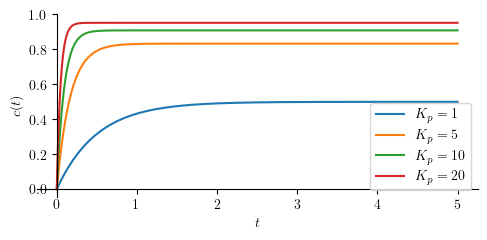

In [9]:
p = [plot(cp.subs(([tau, tau_], [Kp, Kp_[j]])), (t, 0, 5), size=(5, 2.5), ylabel='$c(t)$', show=False, legend=True) for j in range(len(Kp_))]

for j in range(len(p)):
    p[j][0].label = "$K_p=" + str(Kp_[j]) + "$"
    if j > 0:
        p[0].append(p[j][0])

p[0].show()

## First-order system with PD-control 

Closed-loop transfer function:

In [10]:
Qpd = simplify(Q.subs(Ki, 0))

mprint(latex(Qpd))

<IPython.core.display.Math object>

### Closed-loop poles and zeros

In [11]:
f = frac_to_tf(Qpd)
zerospd = f.zeros()
polespd = f.poles()

print("closed-loop zeros:")
mprint(latex(zerospd))

print("closed-loop zeros:")
mprint(latex(polespd))

closed-loop zeros:


<IPython.core.display.Math object>

closed-loop zeros:


<IPython.core.display.Math object>

### Step response

We simply perform an inverse Laplace operation to $C(s)$ and obtain $c(t)$ as the result. Additionally, we will also compute the steady state-value for the output ($c_{ss}$).

A phenomenon that can be observed in a derivative control is the "kick" that happens when a step input is applied to the controlled system. Because of the kick, system output does not start from zero. 

In [12]:
cpd   = logcombine(ilaplace(Qpd * 1/s))
csspd = limit(cpd, t, 'oo')
c0pd  = limit(cpd, t, 0)

mprintb("c(t) = ", latex(cpd))
mprintb("c_{ss} = ", latex(csspd))
mprintb("c(0) = ", latex(c0pd))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Next, we set up arbitrary numerical values to some parameters and run sumulate the controlled system.

In [13]:
tau_ = 1
Kp_  = 20
Kd_  = [0.1, 0.5, 1]

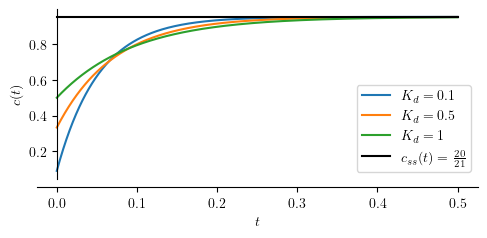

In [14]:
p = [plot(cpd.subs(([tau, tau_], [Kp, Kp_],[Kd, Kd_[j]])), (t, 0, .5), size=(5, 2.5), ylabel='$c(t)$', show=False, legend=True, axis_center=[0,0]) for j in range(len(Kd_))]

for j in range(len(p)):
    p[j][0].label = "$K_d=" + str(Kd_[j]) + "$"
    if j > 0:
        p[0].append(p[j][0])

q = plot(csspd.subs(Kp, Kp_), (t, 0, .5), line_color='k', show=False)

q[0].label = "$ c_{ss} (t) = " + latex(csspd.subs(Kp, Kp_)) + " $"
p[0].append(q[0])
p[0].show()


## First-order system with PI-control 

Closed-loop transfer function:

In [15]:
Qpi = simplify(Q.subs(Kd, 0))

mprintb(latex(Qpi))

<IPython.core.display.Math object>

### Closed-loop poles and zeros

In [16]:
f = frac_to_tf(Qpi)
zerospi = f.zeros()
polespi = f.poles()

print("closed-loop zeros:")
mprint(latex(zerospi))

print("closed-loop zeros:")
mprint(latex(polespi))

closed-loop zeros:


<IPython.core.display.Math object>

closed-loop zeros:


<IPython.core.display.Math object>

### Step response

We simply perform an inverse Laplace operation to $C(s)$ and obtain $c(t)$ as the result. Additionally, we will also compute the steady state-value for the output ($c_{ss}$).

In [17]:
cpi = ilaplace(Qpi * 1/s)
cpi = sum([simplify(cpi.args[j]) for j in range(len(cpi.args))])

csspi = limit(cpi, t, 'oo')

mprintb("c(t) = ", latex(cpi))
mprintb("c_{ss} = ", latex(csspi))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Next, we set up arbitrary numerical values to some parameters and run sumulate the controlled system.

In [18]:
tau_ = 1
Kp_ = 20
Ki_ = [1, 10, 100, 1000]
Kd_ = 0

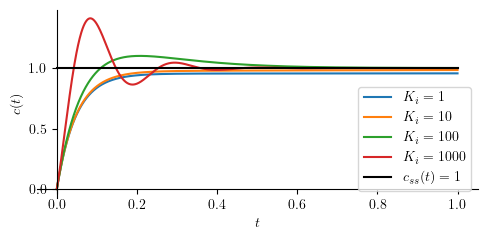

In [19]:
p = [plot(cpi.subs(([tau, tau_], [Kp, Kp_],[Ki, Ki_[j]])), (t, 0, 1), size=(5, 2.5), ylabel='$c(t)$', show=False, legend=True) for j in range(len(Ki_))]

for j in range(len(p)):
    p[j][0].label = "$K_i=" + str(Ki_[j]) + "$"
    if j > 0:
        p[0].append(p[j][0])

q = plot(csspi.subs(Kp, Kp_), (t, 0, 1), line_color='k', show=False)
q[0].label = "$ c_{ss} (t) = " + latex(csspi.subs(Kp, Kp_)) + " $"
p[0].append(q[0])
p[0].show()


### First-order system with PID-control 

In [49]:
f = frac_to_tf(Q)
zerospid = f.zeros()
polespid = f.poles()

print("closed-loop zeros:")
mprint(latex(zerospid))
       
print("closed-loop poles:")
mprint(latex(polespid))

closed-loop zeros:


<IPython.core.display.Math object>

closed-loop poles:


<IPython.core.display.Math object>

In [21]:
cpid   = logcombine(ilaplace(Q * 1/s))
csspid = limit(cpid, t, 'oo')
c0pid  = limit(cpid, t, 0)

mprintb("c(t) = ", latex(cpid))
mprintb("c_{ss} = ", latex(csspid))
mprintb("c(0) = ", latex(c0pid))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Summary

In [60]:
from pandas import DataFrame, set_option
from IPython.display import Markdown, display

def makelatex(args):
    return ["${}$".format(latex(a)) for a in args]

descs = ["P", 
         "PD",
         "PI",
         "PID"]

css_label = [cssp, csspd, csspi, csspid]
c_label   = [cp, cpd, cpi, cpid]
cl_zeros  = [zerosp, zerospd, zerospi, zerospid]
cl_poles  = [polesp, polespd, polespi, polespid]
kicks     = [0, c0pd, 0, c0pid]


dic1 = {''         : makelatex(descs), 
        '$c_{ss}$' : makelatex(css_label),
        '$c(0)$'   : makelatex(kicks)}

dic2 = {''         : makelatex(descs), 
        'Zeros'    : makelatex(cl_zeros),
        'Poles'    : makelatex(cl_poles)}

df1 = DataFrame(dic1)
df2 = DataFrame(dic2)

#### Initial and steady-state output for unit-step input

In [61]:
Markdown(df1.to_markdown(index=False))

|                       | $c_{ss}$                  | $c(0)$                       |
|:----------------------|:--------------------------|:-----------------------------|
| $\mathtt{\text{P}}$   | $\frac{K_{p}}{K_{p} + 1}$ | $0$                          |
| $\mathtt{\text{PD}}$  | $\frac{K_{p}}{K_{p} + 1}$ | $\frac{K_{d}}{K_{d} + \tau}$ |
| $\mathtt{\text{PI}}$  | $1$                       | $0$                          |
| $\mathtt{\text{PID}}$ | $1$                       | $\frac{K_{d}}{K_{d} + \tau}$ |

#### Zeros and poles

In [59]:
Markdown(df2.to_markdown(index=False))

|                       | Zeros                                                                                                                                                                         | Poles                                                                                                                                                                                                                                                                                                                           |
|:----------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| $\mathtt{\text{P}}$   | $\left[ \right]$                                                                                                                                                              | $\left[ - \frac{K_{p} + 1}{\tau}\right]$                                                                                                                                                                                                                                                                                        |
| $\mathtt{\text{PD}}$  | $\left[ - \frac{K_{p}}{K_{d}}\right]$                                                                                                                                         | $\left[ - \frac{K_{p} + 1}{K_{d} + \tau}\right]$                                                                                                                                                                                                                                                                                |
| $\mathtt{\text{PI}}$  | $\left[ - \frac{K_{i}}{K_{p}}\right]$                                                                                                                                         | $\left[ - \frac{K_{p} + 1}{2 \tau} - \frac{\sqrt{- 4 K_{i} \tau + K_{p}^{2} + 2 K_{p} + 1}}{2 \tau}, \  - \frac{K_{p} + 1}{2 \tau} + \frac{\sqrt{- 4 K_{i} \tau + K_{p}^{2} + 2 K_{p} + 1}}{2 \tau}\right]$                                                                                                                     |
| $\mathtt{\text{PID}}$ | $\left[ - \frac{K_{p}}{2 K_{d}} - \frac{\sqrt{- 4 K_{d} K_{i} + K_{p}^{2}}}{2 K_{d}}, \  - \frac{K_{p}}{2 K_{d}} + \frac{\sqrt{- 4 K_{d} K_{i} + K_{p}^{2}}}{2 K_{d}}\right]$ | $\left[ - \frac{K_{p} + 1}{2 \left(K_{d} + \tau\right)} - \frac{\sqrt{- 4 K_{d} K_{i} - 4 K_{i} \tau + K_{p}^{2} + 2 K_{p} + 1}}{2 \left(K_{d} + \tau\right)}, \  - \frac{K_{p} + 1}{2 \left(K_{d} + \tau\right)} + \frac{\sqrt{- 4 K_{d} K_{i} - 4 K_{i} \tau + K_{p}^{2} + 2 K_{p} + 1}}{2 \left(K_{d} + \tau\right)}\right]$ |